# 2D Bounding Box Demo

Here I will spot check the 2D Bounding Boxes given in the training labels for a few sample images.
https://trello.com/c/vkM1ZbVt

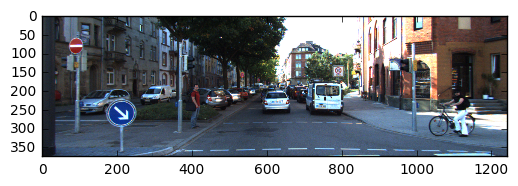

In [130]:
# First just try loading an image
from matplotlib import pyplot as plt
%matplotlib inline
test_image = plt.imread('../images/left/000274.png')
plt.imshow(test_image)
plt.show()

In [131]:
# Open the training data
filename = "../image_labels/000274.txt"
with open(filename) as f:
    records = f.readlines()

# Look at the labels
for record in records:
    print record

Car 0.00 0 -1.59 586.42 199.76 662.87 266.02 1.36 1.69 3.38 0.28 2.08 17.74 -1.58

Car 0.00 1 2.13 78.22 195.25 239.59 268.19 1.59 1.72 3.86 -11.46 2.22 18.60 1.58

Cyclist 0.00 3 2.48 1005.81 190.32 1206.35 331.10 1.68 0.86 2.01 6.30 1.92 9.28 3.06

Van 0.00 3 -1.72 700.62 162.16 807.39 261.63 2.12 1.86 4.41 3.34 1.93 17.73 -1.54

Pedestrian 0.00 0 0.15 389.42 179.08 424.76 303.37 1.87 0.64 0.65 -3.21 1.97 11.22 -0.13

Van 0.00 3 1.99 258.72 187.25 349.36 238.52 1.71 1.56 4.12 -11.33 2.28 26.92 1.59

Car 0.00 1 -2.17 370.32 190.97 497.81 255.70 1.59 1.63 3.64 -4.95 2.11 19.92 -2.41

Car 0.00 2 -2.33 394.24 197.69 512.54 247.36 1.41 1.64 3.61 -5.06 2.23 23.01 -2.55

Car 0.00 2 -2.30 425.76 196.25 535.81 239.43 1.39 1.61 4.09 -4.78 2.27 26.19 -2.48

Car 0.00 2 -2.27 477.24 194.55 553.19 229.87 1.50 1.57 3.54 -4.46 2.53 33.47 -2.40

Car 0.00 2 -2.38 513.87 192.20 570.87 215.15 1.40 1.60 3.55 -4.44 2.67 46.89 -2.47

Car 0.00 2 -1.70 677.08 196.47 732.16 236.22 1.36 1.63 4.02 3.64 2.35 28.

In [132]:
def label_data_record(record):
    """
    Given a string 'record', this will
    output a dictionary of the appropriate labels
    and data types.
    """
    record_list = record.split(" ")
    record_dict = {
        "type":record_list.pop(0),
        "truncated":float(record_list.pop(0)),
        "occluded":int(record_list.pop(0)),
        "alpha":float(record_list.pop(0)),
        "left":float(record_list.pop(0)),
        "top":float(record_list.pop(0)),
        "right":float(record_list.pop(0)),
        "bottom":float(record_list.pop(0)),
        "height":float(record_list.pop(0)),
        "width":float(record_list.pop(0)),
        "length":float(record_list.pop(0)),
        "x":float(record_list.pop(0)),
        "y":float(record_list.pop(0)),
        "z":float(record_list.pop(0)),
    }
    return record_dict

In [133]:
def extract_bbox(labeled_record):
    """
    Given a labeled record from the training data, 
    this will output a 3-tuple with the bounding box parameters.
    This output can be passed into Rectangle()
    """
    width = labeled_record["right"] - labeled_record["left"]
    height = labeled_record["bottom"] - labeled_record["top"]
    bbox = ((labeled_record["left"], labeled_record["top"]), width, height)
    return bbox

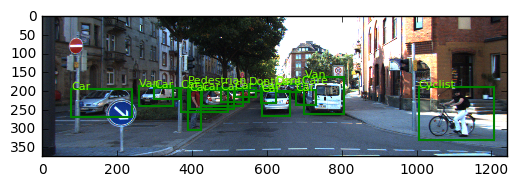

In [134]:
fig,ax = plt.subplots(1)

ax.imshow(test_image)

for record in records:
    # Add keys to the data point
    single_record = label_data_record(record)
    # Get the dimensions and location of the bounding box
    bbox_params = extract_bbox(single_record)
    # Create the bounding box
    bbox = plt.Rectangle(*bbox_params, fill=False,linewidth=1.5,edgecolor='g')
    # Add the bounding box to the plot
    ax.add_patch(bbox)
    # Add a label to the bounding box
    ax.annotate(s = single_record['type'], xy = bbox_params[0],color='#7CFC00', size=8)

## The bounding boxes look good

Looks like the bounding boxes were defined as we thought.